In [1]:
import omicverse as ov
import scanpy as sc
import scvelo as scv

ov.utils.ov_plot_set()


   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.6.6, Tutorials: https://omicverse.readthedocs.io/
All dependencies are satisfied.


In [2]:
ov.utils.download_pathway_database()
ov.utils.download_geneid_annotation_pair()

......Pathway Geneset download start: GO_Biological_Process_2021
......Loading dataset from genesets/GO_Biological_Process_2021.txt
......Pathway Geneset download start: GO_Cellular_Component_2021
......Loading dataset from genesets/GO_Cellular_Component_2021.txt
......Pathway Geneset download start: GO_Molecular_Function_2021
......Loading dataset from genesets/GO_Molecular_Function_2021.txt
......Pathway Geneset download start: WikiPathway_2021_Human
......Loading dataset from genesets/WikiPathway_2021_Human.txt
......Pathway Geneset download start: WikiPathways_2019_Mouse
......Loading dataset from genesets/WikiPathways_2019_Mouse.txt
......Pathway Geneset download start: Reactome_2022
......Loading dataset from genesets/Reactome_2022.txt
......Pathway Geneset download finished!
......Other Genesets can be dowload in `https://maayanlab.cloud/Enrichr/#libraries`
......Geneid Annotation Pair download start: pair_GRCm39
......Loading dataset from genesets/pair_GRCm39.tsv
......Geneid A

In [3]:
adata = sc.read_h5ad("./Integrate/adata_ovary_combined_raw_sample_follicle.h5ad")
adata

AnnData object with n_obs × n_vars = 303411 × 19028
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'Sample', 'n_counts', 'follicle_annotation', 'celltype_annotation'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts-AAV', 'mean_counts-AAV', 'log1p_mean_counts-AAV', 'pct_dropout_by_counts-AAV', 'total_counts-AAV', 'log1p_total_counts-AAV', 'n_cells_by_counts-CTR', 'mean_counts-CTR', 'log1p_mean_counts-CTR', 'pct_dropout_by_counts-CTR', 'total_counts-CTR', 'log1p_total_counts-CTR', 'n_cells'
    uns: 'Sample_colors', 'log1p', 'rank_genes_groups'
    obsm: 'spatial'
    layers: 'counts', 'log1p'

# ovulation related pathway!
AAV组中与凋亡、排卵和黄体形成有关的通路等等是有变化的

就凋亡，炎症反应，血管生成，花生四烯酸代谢、溶血磷脂代谢的module score能不能做出这效果

In [4]:
pathway_dict=ov.utils.geneset_prepare('genesets/GO_Biological_Process_2021.txt',organism='Mouse')
pathway_dict

{"'de novo' posttranslational protein folding (GO:0051084)": ['Sdf2l1',
  'Hspa9',
  'Cct2',
  'St13',
  'Hspa6',
  'Entpd5',
  'Hspa5',
  'Ptges3',
  'Hspa1l',
  'Hspa8',
  'Dnajb13',
  'Hspa2',
  'Dnajb14',
  'Hspe1',
  'Dnajc18',
  'Gak',
  'Dnajc7',
  'Dnajb12',
  'Hspa1a',
  'Hspa1b',
  'Ero1a',
  'Selenof',
  'Hspa14',
  'Hspa13',
  'Dnajb1',
  'Chchd4',
  'Bag1',
  'Dnajb5',
  'Dnajb4',
  'Sdf2',
  'Uggt1'],
 '2-oxoglutarate metabolic process (GO:0006103)': ['Idh1',
  'Phyh',
  'Aadat',
  'Got2',
  'Mrps36',
  'Got1',
  'Idh2',
  'Adhfe1',
  'Gpt2',
  'Tat',
  'Dlst',
  'L2hgdh',
  'D2hgdh',
  'Ogdh'],
 "3'-phosphoadenosine 5'-phosphosulfate biosynthetic process (GO:0050428)": ['Slc26a1',
  'Slc35b3',
  'Slc26a2',
  'Slc35b2',
  'Papss1',
  'Papss2'],
 "3'-phosphoadenosine 5'-phosphosulfate metabolic process (GO:0050427)": ['Abhd14b',
  'Tpst2',
  'Sult2b1',
  'Sult1b1',
  'Tpst1',
  'Sult6b1',
  'Slc26a1',
  'Slc35b3',
  'Slc26a2',
  'Slc35b2',
  'Papss1',
  'Papss2',
  'Sult2a

In [5]:
##Assest all pathways
adata_aucs=ov.single.pathway_aucell_enrichment(adata,
                                                  pathways_dict=pathway_dict,
                                                  num_workers=8)

ctxcore have been install version: 0.2.0


In [6]:
adata_aucs.obs=adata[adata_aucs.obs.index].obs
adata_aucs.obsm=adata[adata_aucs.obs.index].obsm
adata_aucs.obsp=adata[adata_aucs.obs.index].obsp
adata_aucs

AnnData object with n_obs × n_vars = 303411 × 6036
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'Sample', 'n_counts', 'follicle_annotation', 'celltype_annotation'
    obsm: 'spatial'

In [7]:
# adata_aucs.write_h5ad('Integrate/adata_total_auce_test.h5ad',compression='gzip')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:04:39)


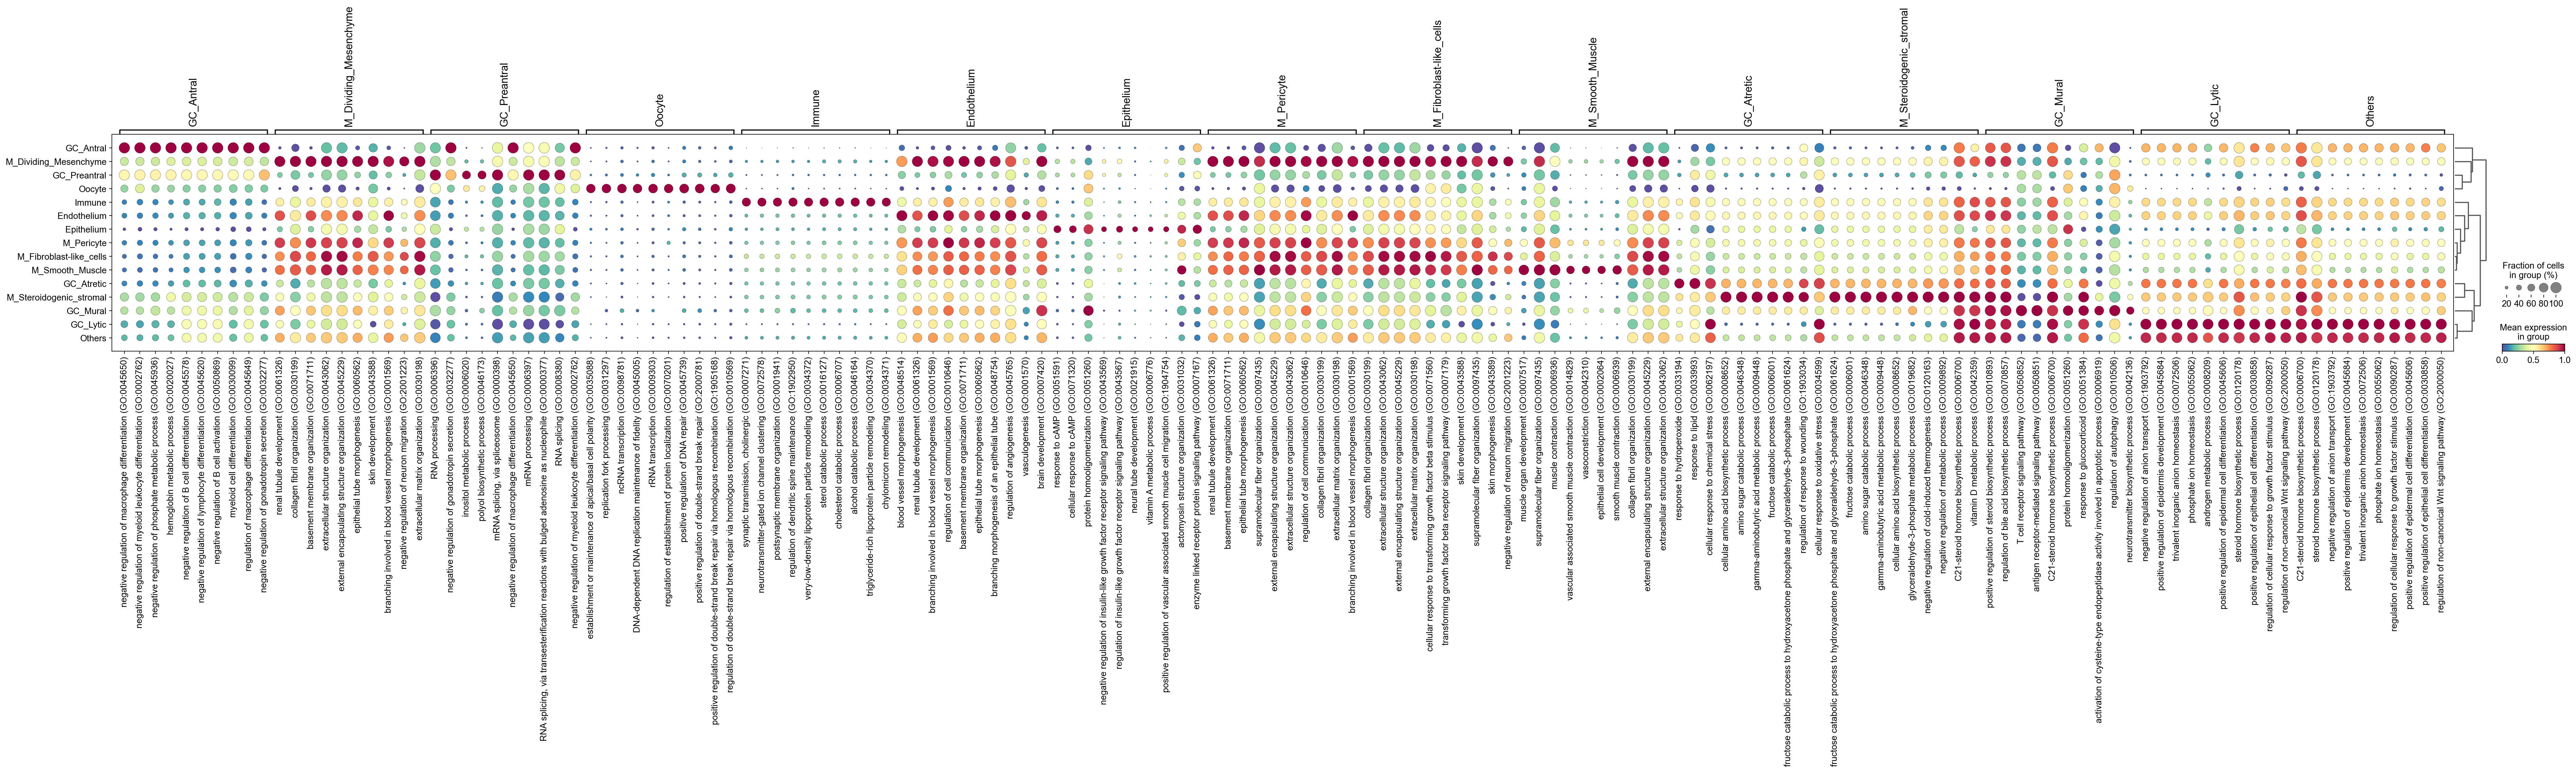

In [9]:
#adata_aucs.uns['log1p']['base']=None
sc.tl.rank_genes_groups(adata_aucs, 'celltype_annotation', method='t-test',n_genes=50)
sc.pl.rank_genes_groups_dotplot(adata_aucs,groupby='celltype_annotation',
                                cmap='Spectral_r',
                                standard_scale='var',n_genes=10)

In [7]:
##Assest all pathways
adata_aucs=ov.single.pathway_aucell_enrichment(adata_aucs_before,
                                                  pathways_dict=pathway_dict,
                                                  num_workers=8)

ctxcore have been install version: 0.2.0


In [19]:
adata_aucs.obs=adata_aucs_before[adata_aucs.obs.index].obs
adata_aucs.obsm=adata_aucs_before[adata_aucs.obs.index].obsm
adata_aucs.obsp=adata_aucs_before[adata_aucs.obs.index].obsp
adata_aucs

AnnData object with n_obs × n_vars = 118056 × 6036
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'n_counts', 'leiden_1.0', 'leiden_1.2', 'leiden_1.5', 'annotation', 'batch'
    obsm: 'X_pca', 'X_umap', 'spatial'

In [20]:
adata_aucs.write_h5ad('pyobjs/antral_auc.h5ad',compression='gzip')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:18)


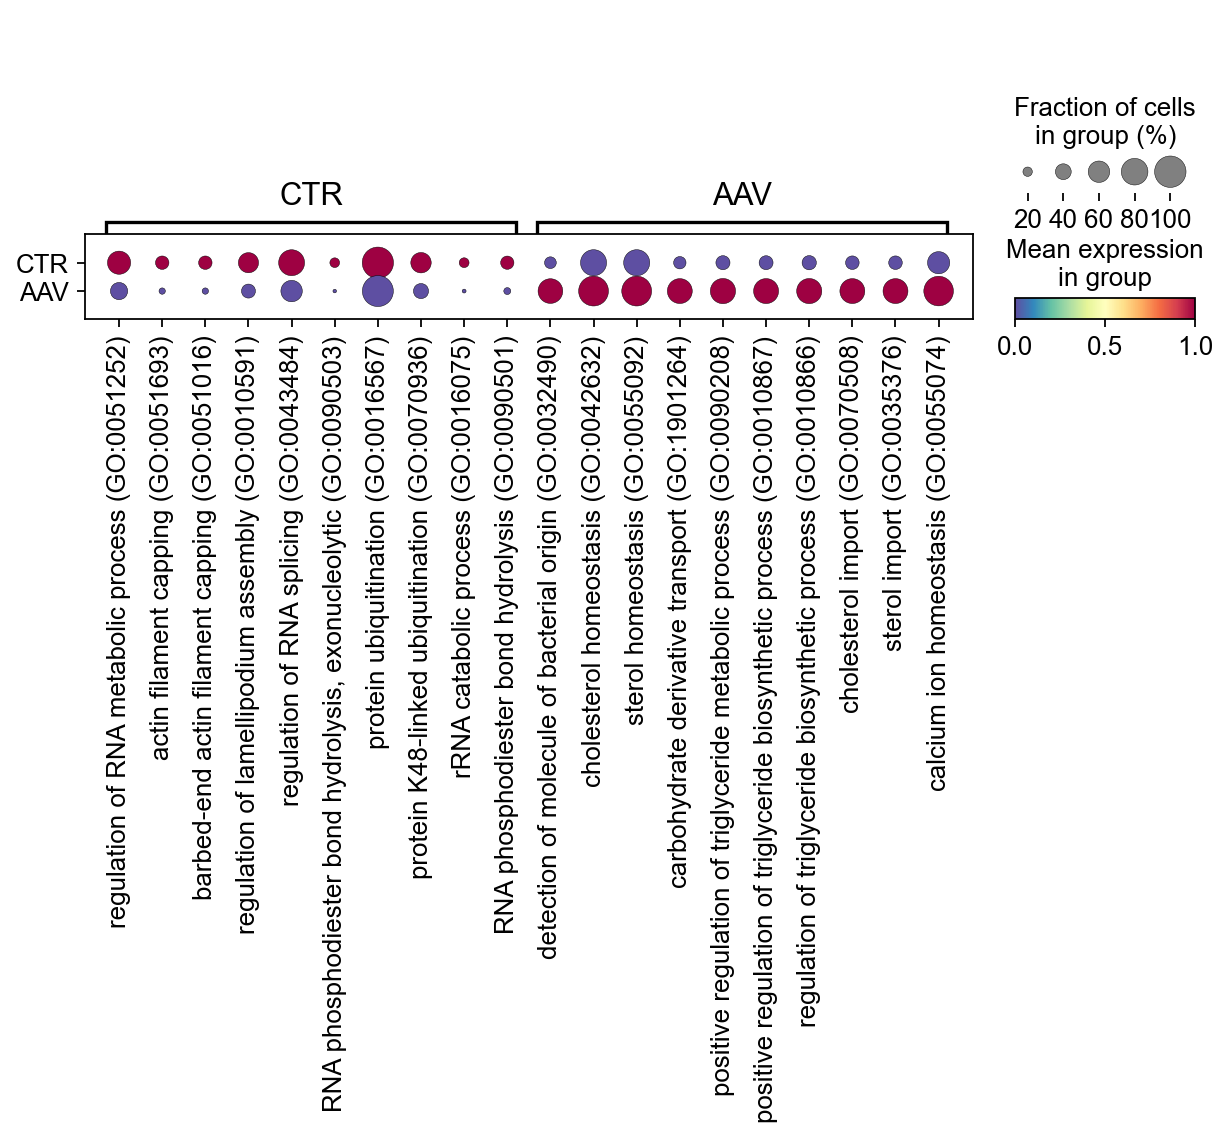

In [31]:
adata_aucs = sc.read_h5ad('pyobjs/antral_auc.h5ad')
#adata_aucs.uns['log1p']['base']=None
sc.tl.rank_genes_groups(adata_aucs, 'batch', method='t-test',n_genes=100)
sc.pl.rank_genes_groups_dotplot(adata_aucs,groupby='batch',
                                cmap='Spectral_r',
                                standard_scale='var',n_genes=10,)

In [32]:
# adata_aucs_before.uns['lognorm']['base']=None
sc.tl.rank_genes_groups(adata_aucs_before, 'batch', method='t-test',n_genes=3000)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:03)


2024-09-15 16:14:39,979 Downloading mmusculus_gene_ensembl for the first time. It might take a couple of miniutes.
2024-09-15 16:17:28,437 Downloading mmusculus_gene_ensembl for the first time. It might take a couple of miniutes.


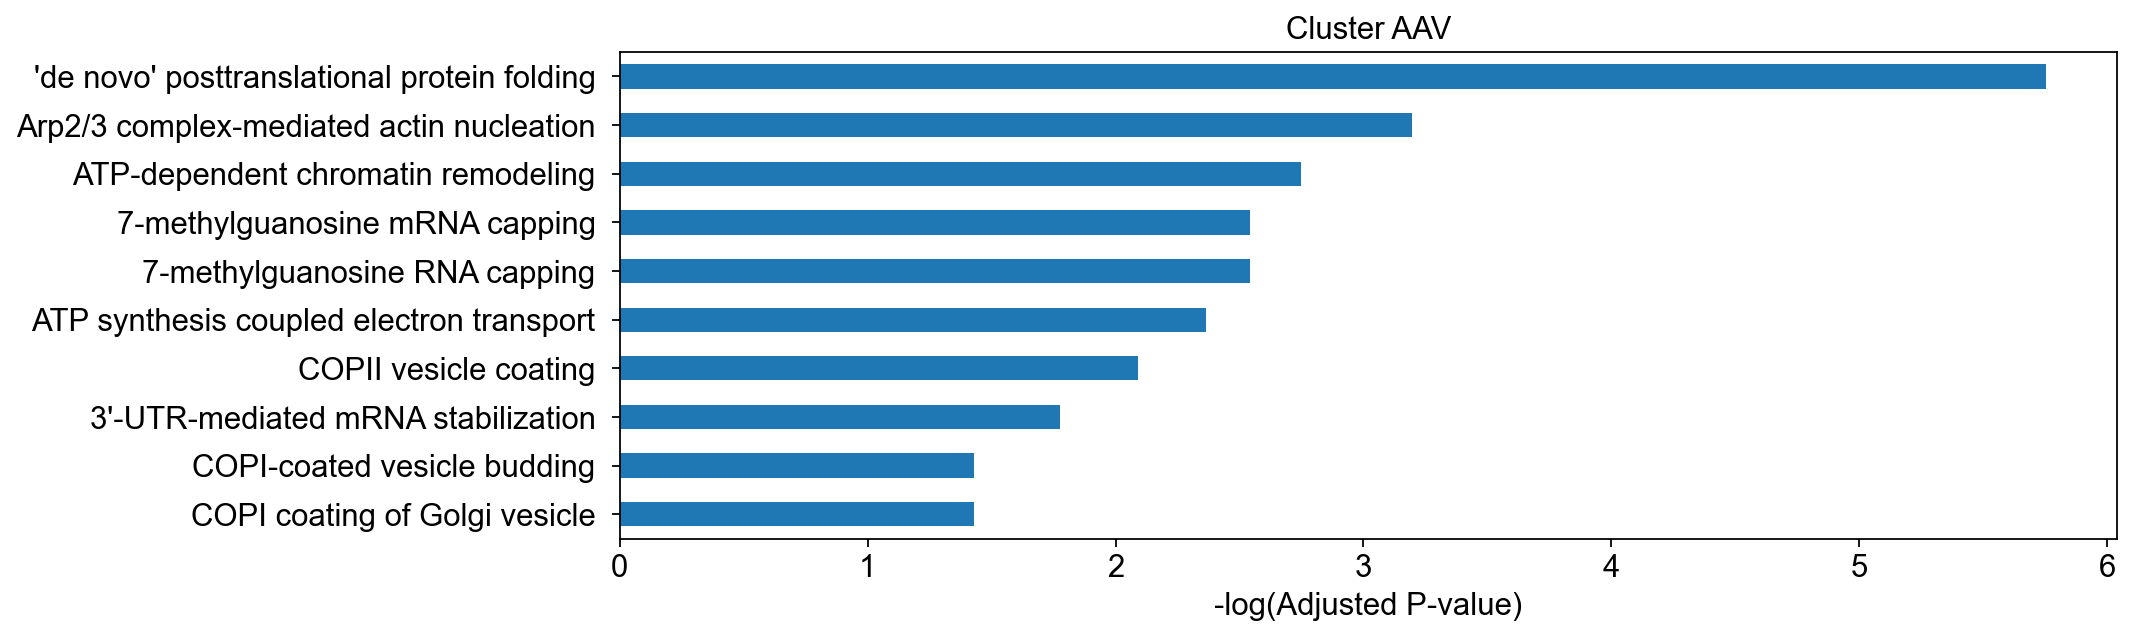

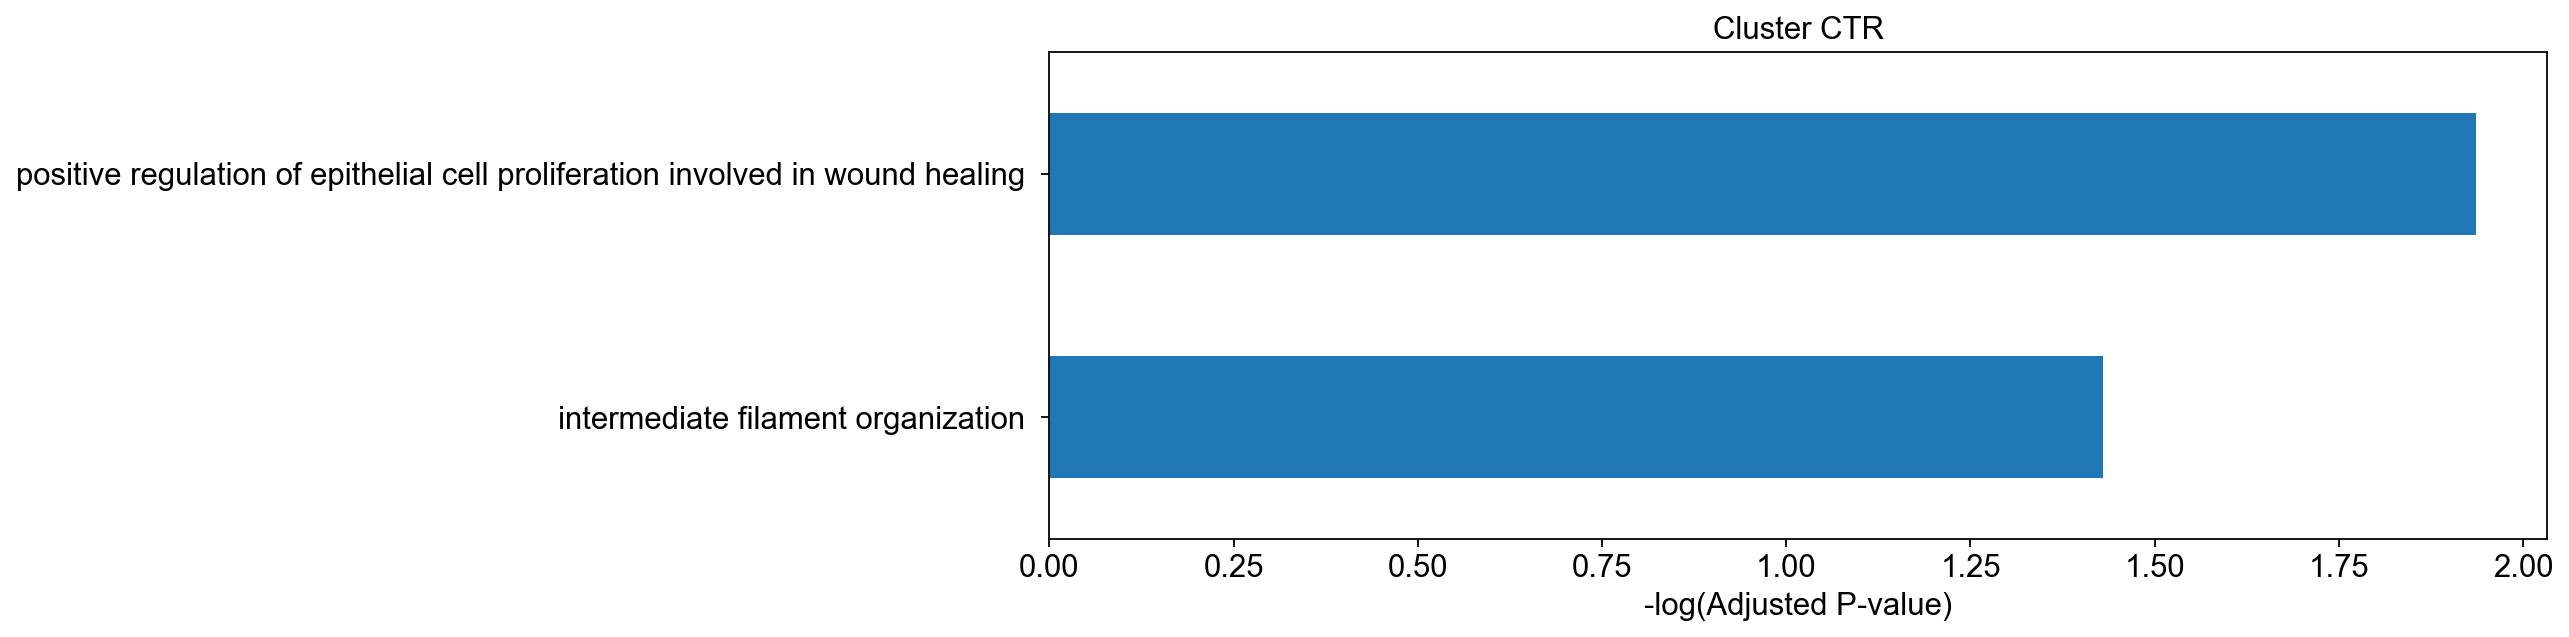

In [33]:
res=ov.single.pathway_enrichment(adata_aucs_before,pathways_dict=pathway_dict,organism='Mouse',
                                     group_by='batch',plot=True)

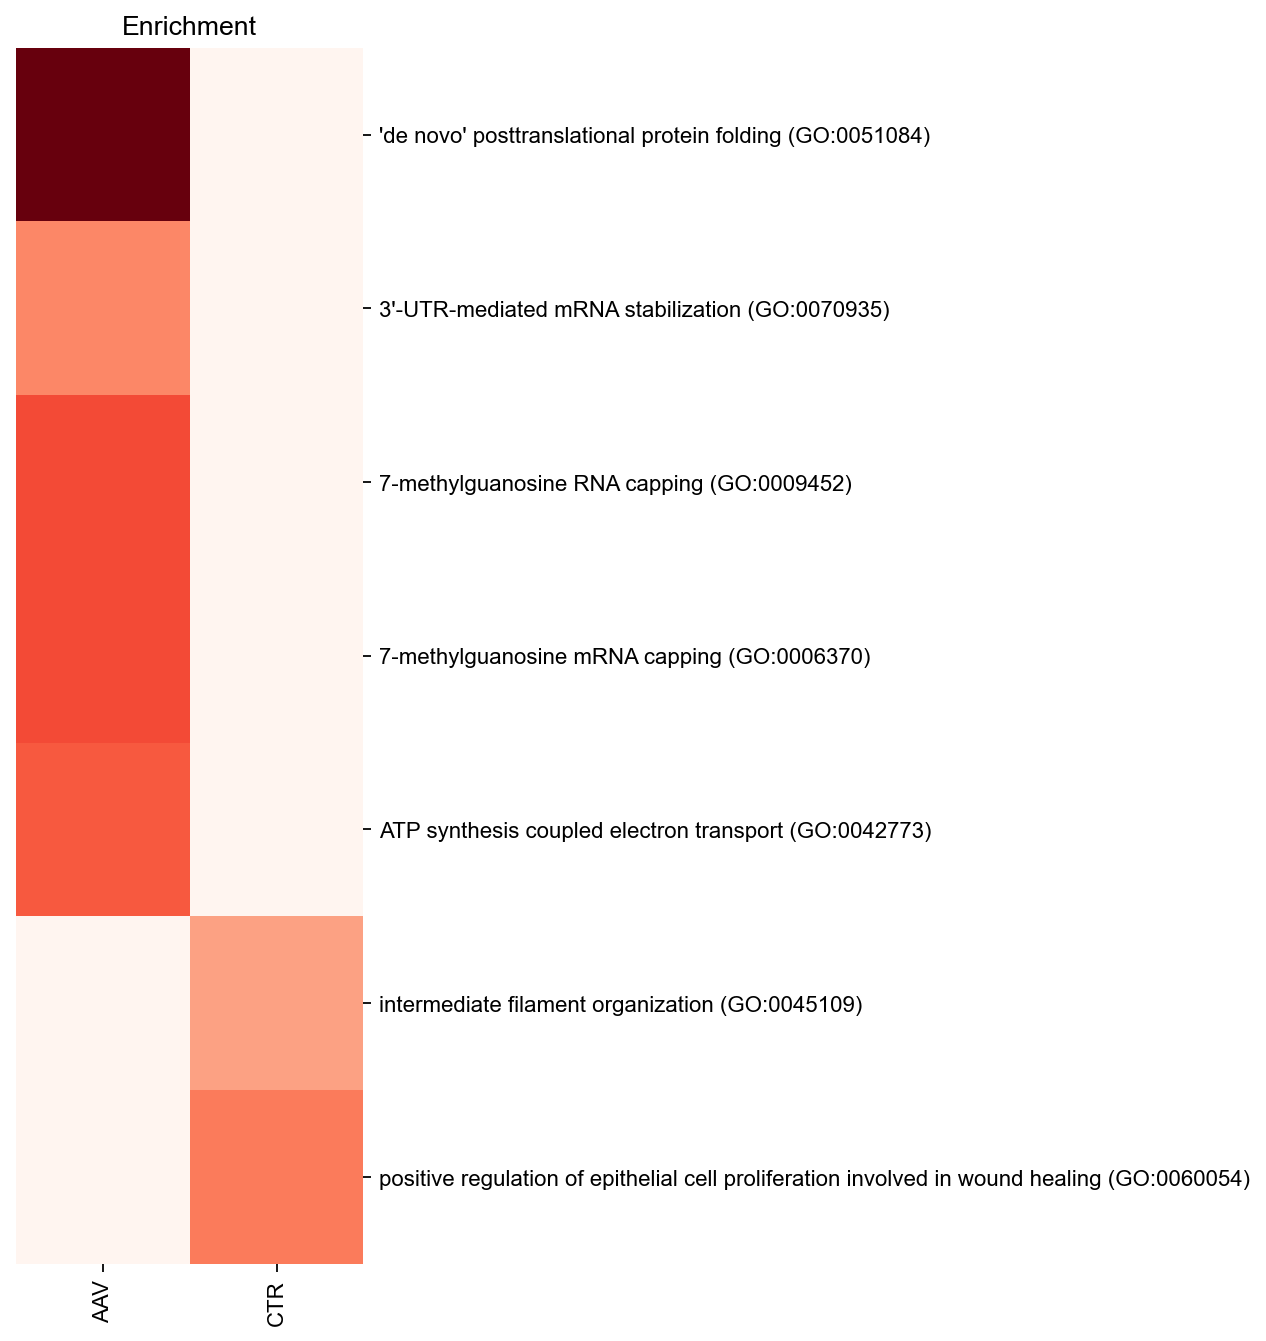

In [34]:
ax=ov.single.pathway_enrichment_plot(res,plot_title='Enrichment',cmap='Reds',
                                         xticklabels=True,cbar=False,square=True,vmax=10,
                                         yticklabels=True,cbar_kws={'label': '-log10(qvalue)','shrink': 0.5,})

In [35]:
import pandas as pd
res.to_csv("csv/enrichment_ctr_vs_aav_an.csv", index=False)

In [11]:
adata_aucs_before = adata[~adata.obs['annotation'].isin(['Atretic'])]
adata_aucs_before.obs_names_make_unique()

In [12]:
##Assest all pathways
adata_aucs=ov.single.pathway_aucell_enrichment(adata_aucs_before,
                                                  pathways_dict=pathway_dict,
                                                  num_workers=8)

ctxcore have been install version: 0.2.0


In [13]:
adata_aucs.obs=adata_aucs_before[adata_aucs.obs.index].obs
adata_aucs.obsm=adata_aucs_before[adata_aucs.obs.index].obsm
adata_aucs.obsp=adata_aucs_before[adata_aucs.obs.index].obsp
adata_aucs

AnnData object with n_obs × n_vars = 132746 × 6036
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'n_counts', 'leiden_1.0', 'leiden_1.2', 'leiden_1.5', 'annotation', 'batch'
    obsm: 'X_pca', 'X_umap', 'spatial'

In [14]:
adata_aucs.write_h5ad('pyobjs/pre_to_antral_auc.h5ad',compression='gzip')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:28)


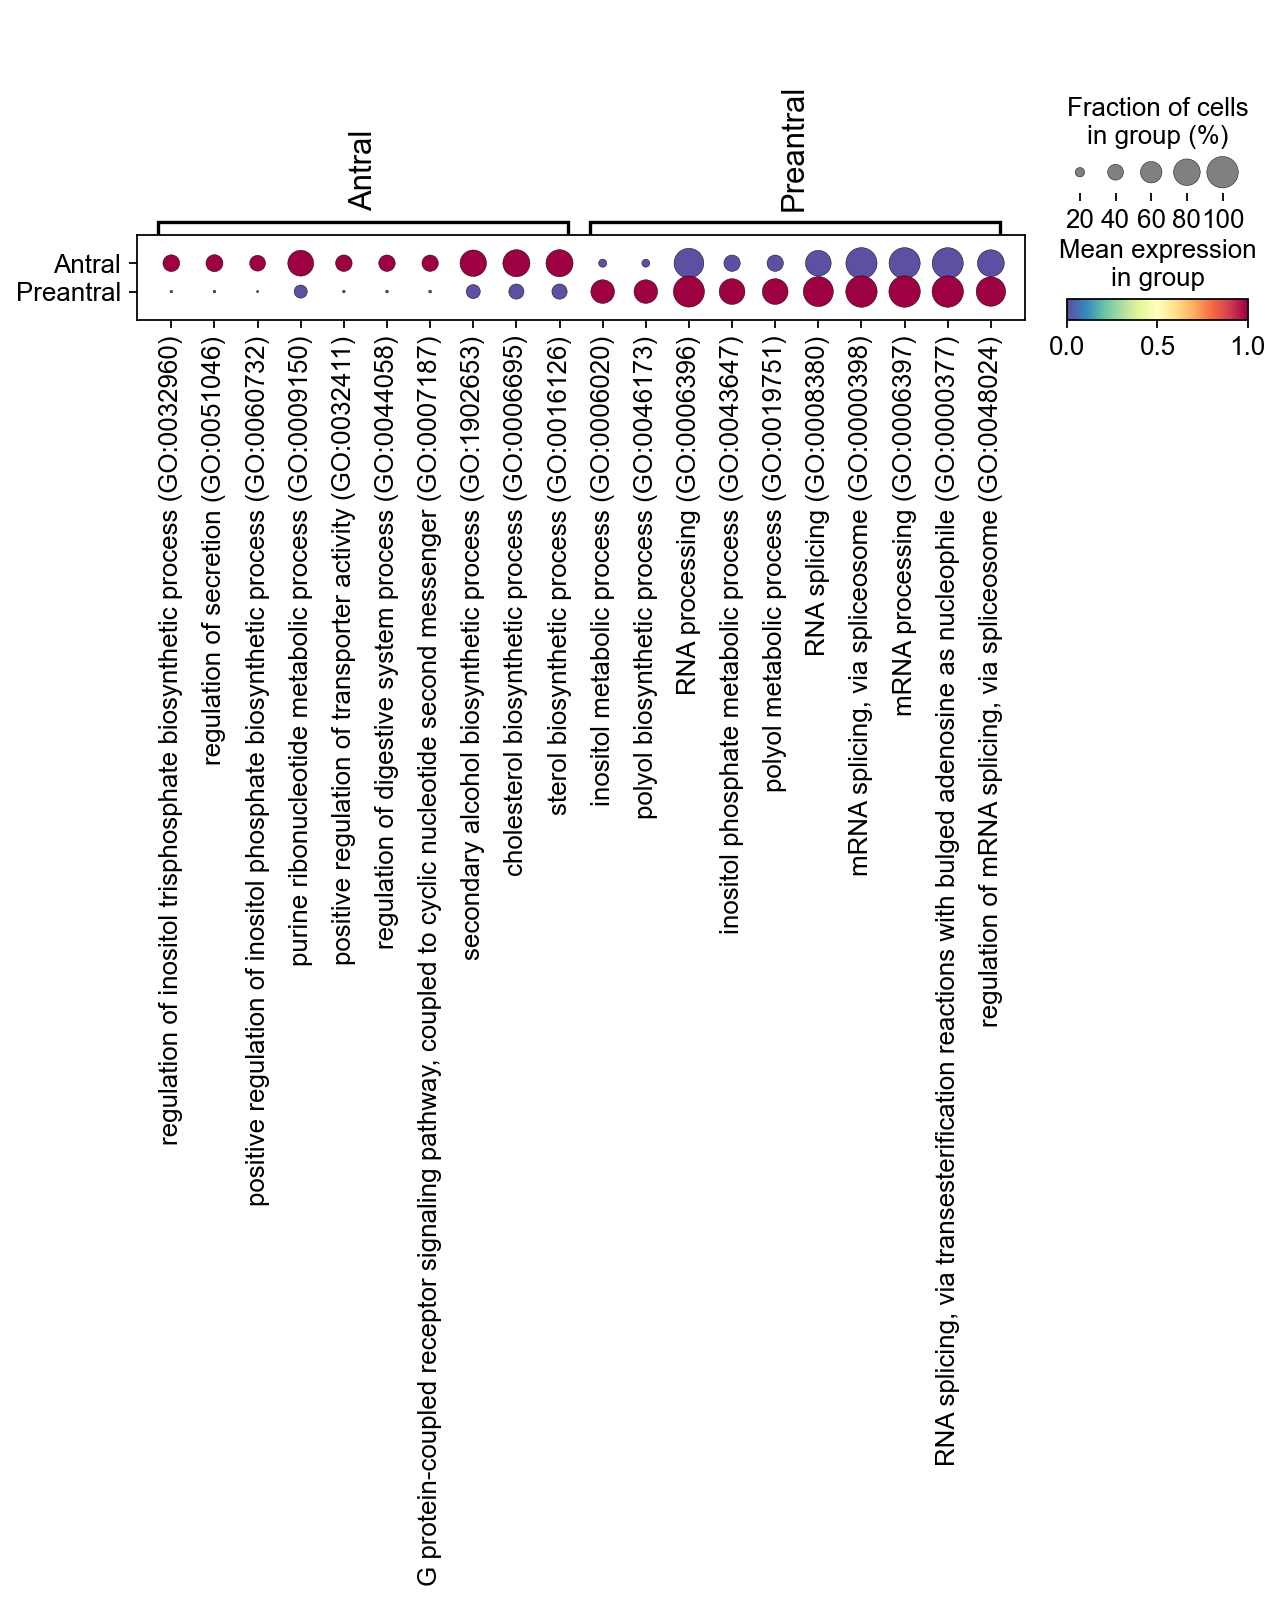

In [16]:
#adata_aucs.uns['log1p']['base']=None
sc.tl.rank_genes_groups(adata_aucs, 'annotation', method='t-test',n_genes=100)
sc.pl.rank_genes_groups_dotplot(adata_aucs,groupby='annotation',
                                cmap='Spectral_r',
                                standard_scale='var',n_genes=10,)

In [19]:
# adata_aucs_before.uns['lognorm']['base']=None
sc.tl.rank_genes_groups(adata_aucs_before, 'annotation', method='t-test',n_genes=3000)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:03)


2024-09-15 15:59:17,940 Downloading mmusculus_gene_ensembl for the first time. It might take a couple of miniutes.


2024-09-15 16:02:36,149 Downloading mmusculus_gene_ensembl for the first time. It might take a couple of miniutes.


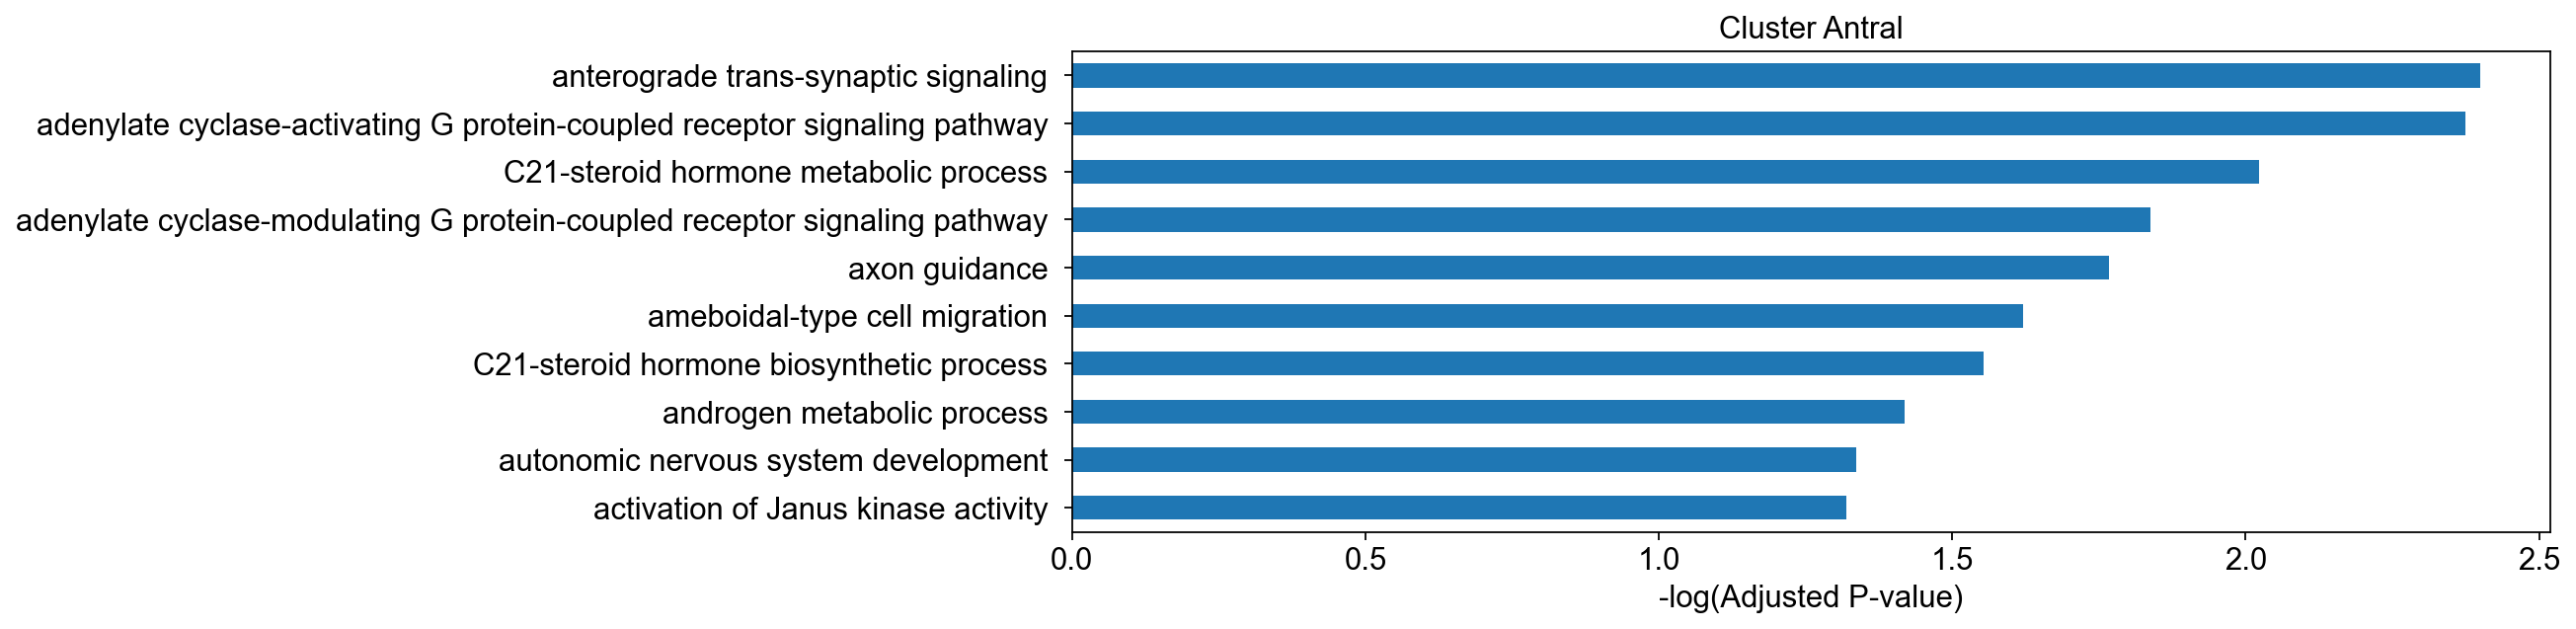

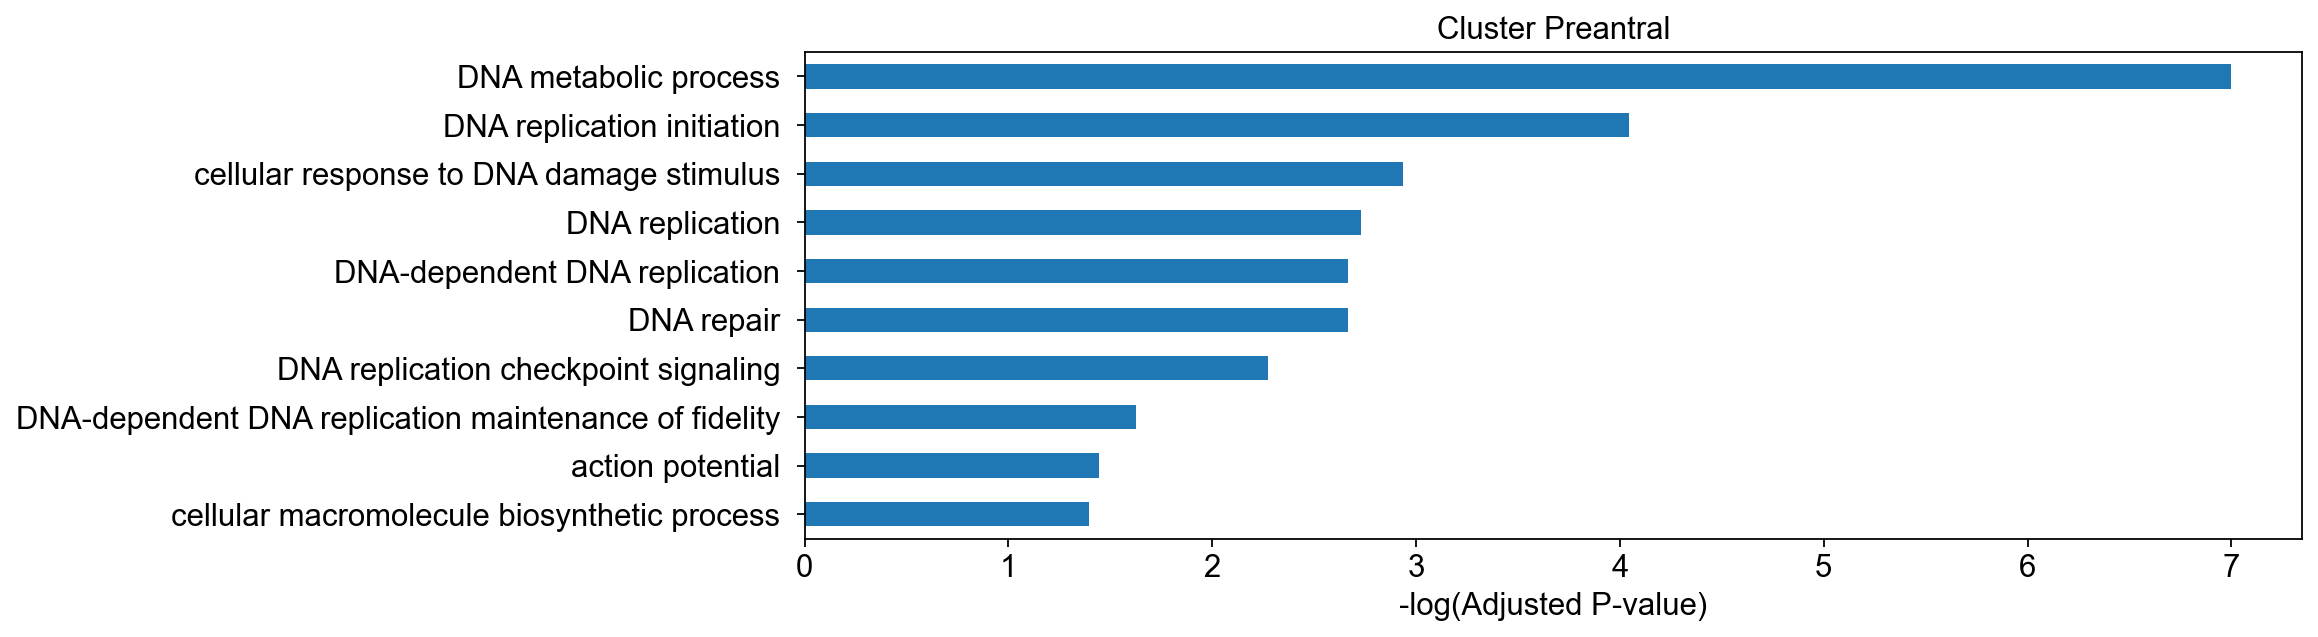

In [20]:
res=ov.single.pathway_enrichment(adata_aucs_before,pathways_dict=pathway_dict,organism='Mouse',
                                     group_by='annotation',plot=True)

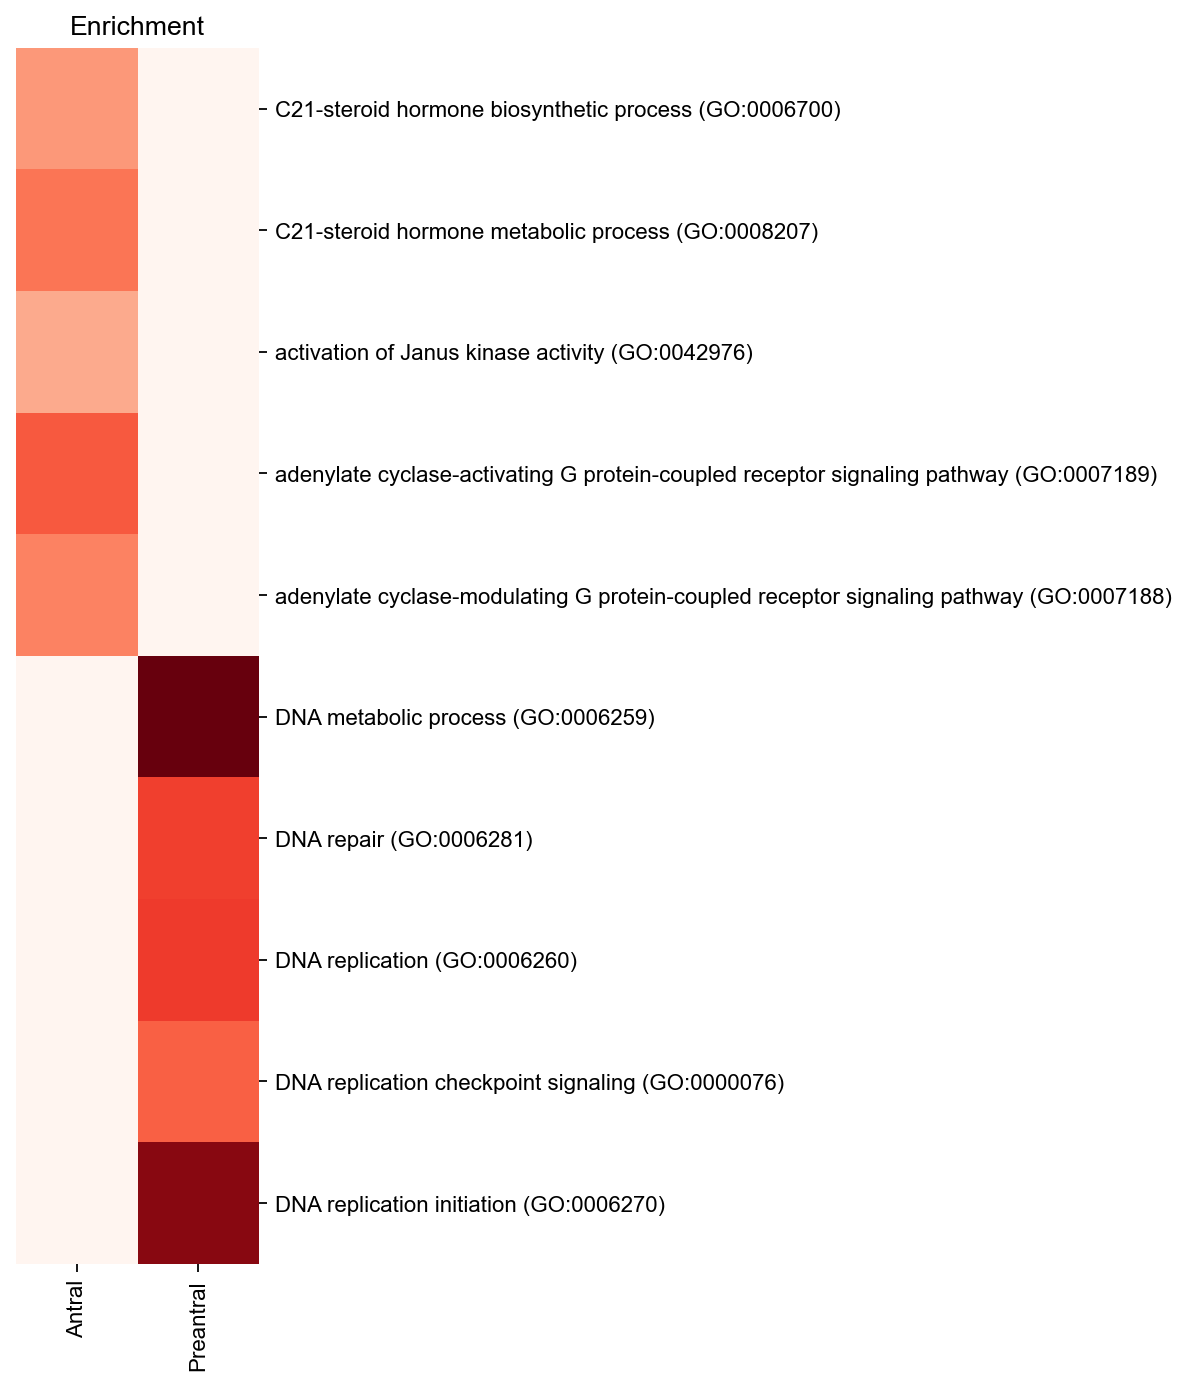

In [21]:
ax=ov.single.pathway_enrichment_plot(res,plot_title='Enrichment',cmap='Reds',
                                         xticklabels=True,cbar=False,square=True,vmax=10,
                                         yticklabels=True,cbar_kws={'label': '-log10(qvalue)','shrink': 0.5,})

In [24]:
import pandas as pd
res.to_csv("csv/enrichment_pre_vs_an.csv", index=False)

# 2. after selected

In [40]:
import pandas as pd
import omicverse as ov
res = pd.read_csv("./csv/afterSelection_enrichment_ctr_vs_aav_an.csv")
res.head()

Cluster             Gene_set  \
0     AAV  CUSTOM2870891388864   
1     AAV  CUSTOM2870891388864   
2     AAV  CUSTOM2870891388864   
3     AAV  CUSTOM2870891388864   
4     AAV  CUSTOM2870891388864   

                                                Term  Odds Ratio  \
0  negative regulation of apoptotic process (GO:0...    2.524044   
1               regulation of autophagy (GO:0010506)    2.826579   
2          cellular response to hypoxia (GO:0071456)    3.496213   
3                        macroautophagy (GO:0016236)    3.635459   
4               NIK/NF-kappaB signaling (GO:0038061)    4.061095   

        P-value  Adjusted P-value  \
0  3.410000e-13      5.990000e-11   
1  1.700000e-09      1.360000e-07   
2  2.080000e-09      1.610000e-07   
3  2.780000e-09      1.980000e-07   
4  7.100000e-08      3.450000e-06   

                                               Genes       logp      logc  \
0  Cflar;Hspa5;Prdx2;Spry2;Sfpq;Ptk2;Mef2c;Birc6;...  23.538430  0.925862   
1  Ctsa;Atp6v1a;Golga2;Atp6v0e2;Csnk2a2;Bad;Dapk3...  15.811685  1.039067   
2  Psma1;Psmc2;Pgk1;Psmb2;Mgarp;Psmb5;Psma4;Psmd2...  15.643542  1.251680   
3  Vps41;Ambra1;Stam2;Chmp4b;Csnk2a2;Stam;Prkaa1;...  15.434220  1.290735   
4  Psma1;Psmc2;Psmb2;Psma4;Psmb5;Psmd2;Map3k7;Psm...  12.577587  1.401453   

   num  fraction  
0   76  0.169265  
1   42  0.190909  
2   30  0.236220  
3   28  0.245614  
4   20  0.273973

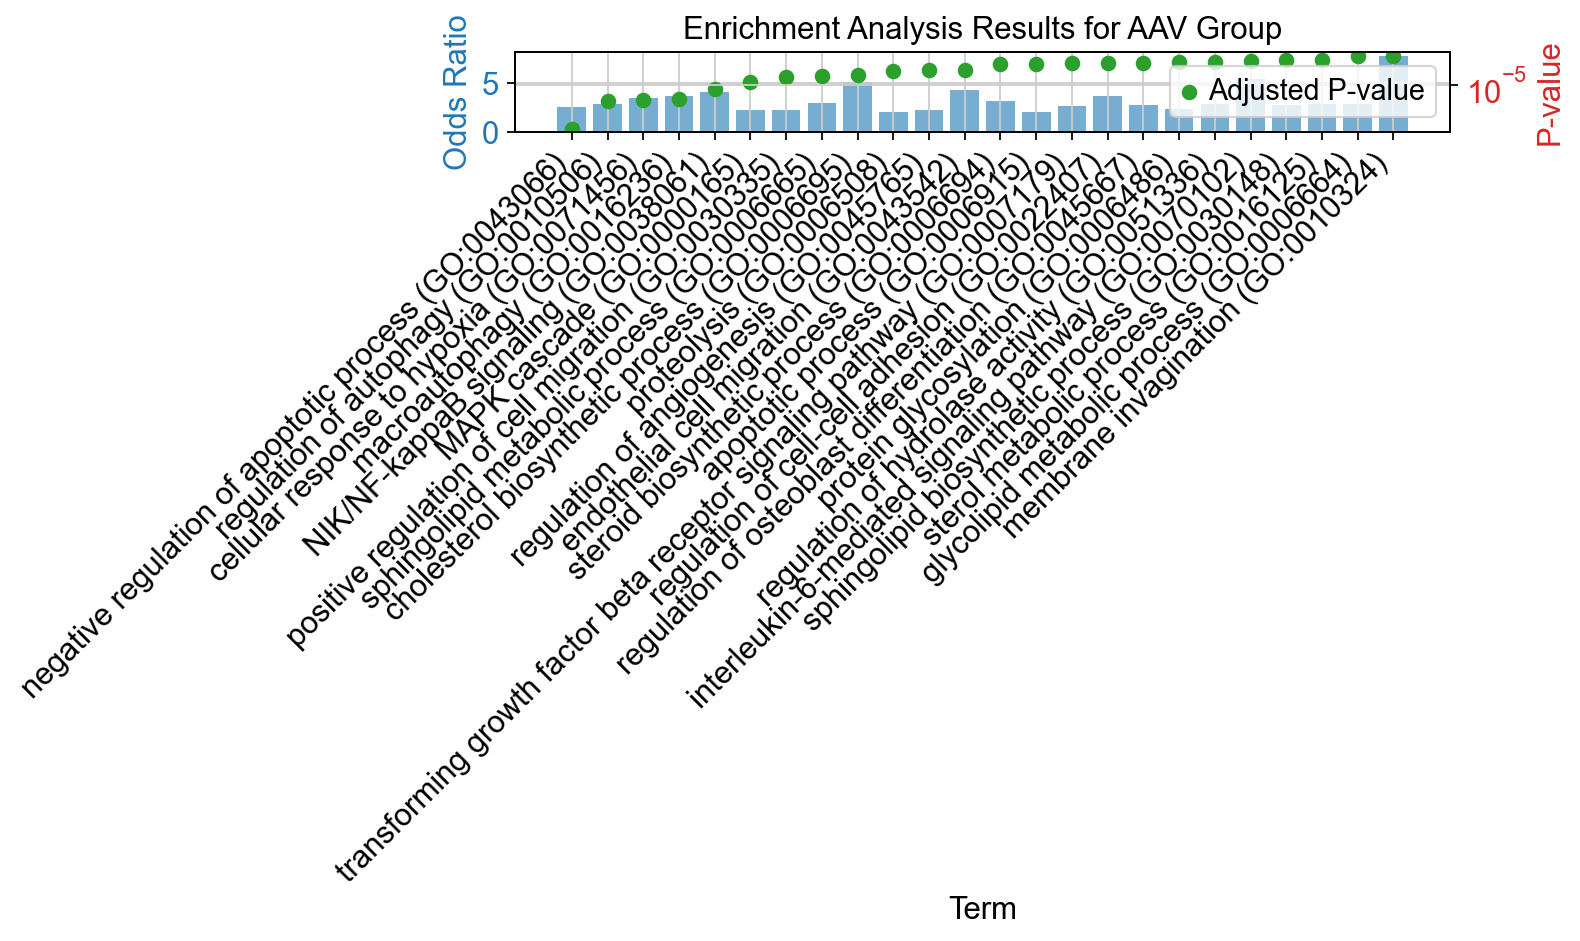

In [45]:
import pandas as pd
import matplotlib.pyplot as plt


# # 过滤出 AAV 组的数据
# aav_df = df[df['Cluster'] == 'AAV']
aav_df = pd.DataFrame(res)
# 提取所需的列
terms = aav_df['Term'].values
odds_ratios = aav_df['Odds Ratio'].values
p_values = aav_df['P-value'].values
adj_p_values = aav_df['Adjusted P-value'].values

# 创建图表
fig, ax1 = plt.subplots(figsize=(10, 6))

# 绘制 Odds Ratio 的柱状图
color = 'tab:blue'
ax1.set_xlabel('Term')
ax1.set_ylabel('Odds Ratio', color=color)
bars = ax1.bar(terms, odds_ratios, color=color, alpha=0.6)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(range(len(terms)), terms, rotation=45, ha='right')

# 创建第二个 y 轴
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('P-value', color=color)
# ax2.scatter(range(len(terms)), p_values, color=color, label='P-value', marker='x')
ax2.scatter(range(len(terms)), adj_p_values, color='tab:green', label='Adjusted P-value', marker='o')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_yscale('log')  # P-values 通常用对数尺度展示

# 添加图例
fig.tight_layout()  # 避免标签重叠
ax2.legend(loc='upper right')

# 添加题目
plt.title('Enrichment Analysis Results for AAV Group')

# 显示图表
plt.show()
